In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\Lenovo\OneDrive\Documents\Data set\MLL\abalone.csv")

In [4]:
df.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [8]:
df.describe()*100

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,417700.000000,417700.000000,417700.000000,417700.000000,417700.000000,417700.000000,417700.000000,417700.000000
mean,52.399210,40.788125,13.951640,82.874216,35.936749,18.059361,23.883086,993.368446
std,12.009291,9.923987,4.182706,49.038902,22.196295,10.961425,13.920267,322.416903
min,7.500000,5.500000,0.000000,0.200000,0.100000,0.050000,0.150000,100.000000
25%,45.000000,35.000000,11.500000,44.150000,18.600000,9.350000,13.000000,800.000000
50%,54.500000,42.500000,14.000000,79.950000,33.600000,17.100000,23.400000,900.000000
75%,61.500000,48.000000,16.500000,115.300000,50.200000,25.300000,32.900000,1100.000000
max,81.500000,65.000000,113.000000,282.550000,148.800000,76.000000,100.500000,2900.000000


In [9]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.shape

(4177, 9)

In [17]:
df['Sex'].value_counts()

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

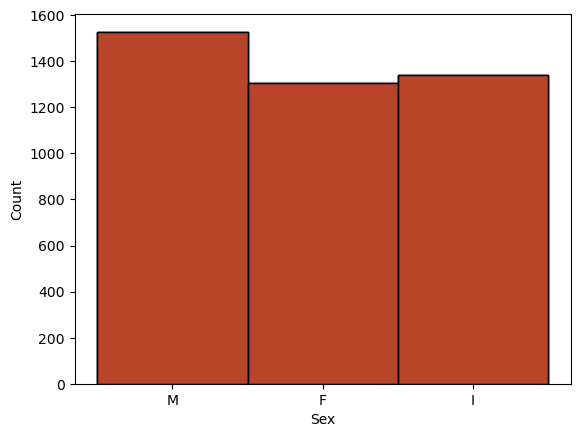

In [22]:
%matplotlib inline

sns.histplot(df['Sex'],bins=20)
plt.show()

In [23]:
df['Sex']=df['Sex'].map({"M":0,"F":1,"I":2})

In [24]:
df['Sex'].value_counts()

Sex
0    1528
2    1342
1    1307
Name: count, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


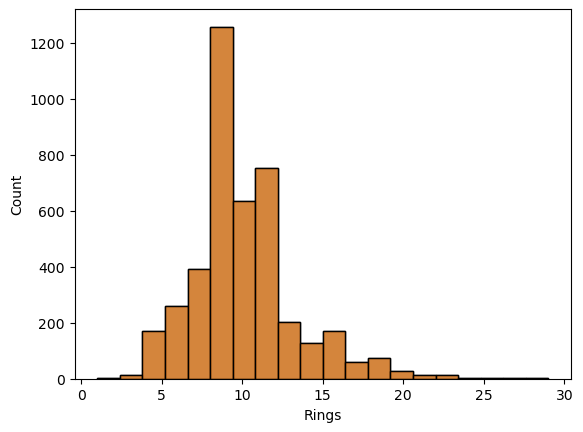

In [27]:
sns.histplot(df['Rings'],bins=20)
plt.show()

In [28]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
29      1
26      1
2       1
25      1
Name: count, dtype: int64

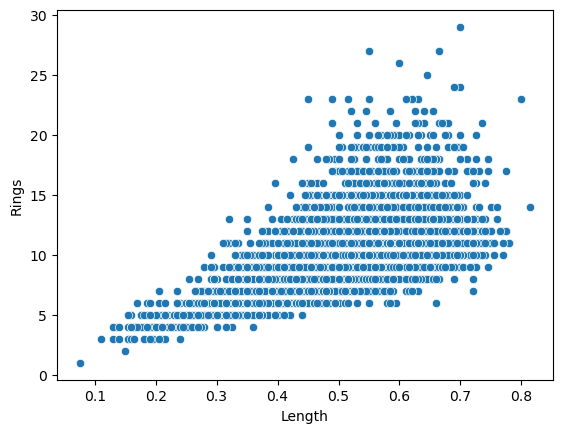

In [30]:
sns.scatterplot(x='Length',y='Rings',data=df)
plt.show()

In [31]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [32]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [33]:
X.shape

(4177, 8)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [38]:
X_train

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
82,1,0.520,0.425,0.165,0.9885,0.3960,0.2250,0.3200
1161,0,0.610,0.485,0.160,1.0145,0.5315,0.2120,0.2415
3132,1,0.685,0.530,0.170,1.5105,0.7385,0.3525,0.3725
3672,1,0.595,0.440,0.135,0.9640,0.5005,0.1715,0.2575
68,1,0.475,0.390,0.120,0.5305,0.2135,0.1155,0.1700
...,...,...,...,...,...,...,...,...
3335,1,0.425,0.325,0.135,0.3820,0.1465,0.0790,0.1400
1099,2,0.500,0.375,0.140,0.5495,0.2480,0.1120,0.1585
2514,2,0.470,0.370,0.110,0.5555,0.2500,0.1150,0.1630
3606,1,0.510,0.375,0.110,0.5805,0.2865,0.1180,0.1480


## standarization the data

In [56]:
from sklearn.preprocessing import StandardScaler
scalr=StandardScaler()

In [57]:
x_train_scal=scalr.fit_transform(X_train)
x_test_scal=scalr.fit_transform(X_test)

In [58]:
x_train_scal

array([[ 0.05995621, -0.04375418,  0.16375944, ...,  0.16461909,
         0.40936642,  0.58511393],
       [-1.15406626,  0.71476099,  0.77489631, ...,  0.78012036,
         0.28950211,  0.01613635],
       [ 0.05995621,  1.34685698,  1.23324896, ...,  1.72040642,
         1.58495863,  0.96564034],
       ...,
       [ 1.27397869, -0.46515151, -0.39644936, ..., -0.49857784,
        -0.60487   , -0.55284124],
       [ 0.05995621, -0.12803365, -0.34552129, ..., -0.3327786 ,
        -0.57720901, -0.66156307],
       [-1.15406626, -0.21231311, -0.34552129, ..., -0.38955916,
        -0.13463312, -0.65793901]])

# Training Models

In [59]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
# Define a list a model to train and compare 
models=[
     ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42))
]

  # Train and evaluate each model
for name, model in models:                #its tuple not dict so dont nedd models.item
    model.fit(x_train_scal, y_train)
    y_pred = model.predict(x_test_scal)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}: MSE = {mse:.2f}, R2 = {r2:.2f}')

Linear Regression: MSE = 5.86, R2 = 0.52
Ridge Regression: MSE = 5.86, R2 = 0.52
Lasso Regression: MSE = 8.84, R2 = 0.28
Decision Tree: MSE = 10.41, R2 = 0.15
Random Forest: MSE = 5.42, R2 = 0.56


# choose model

In [64]:
rf = RandomForestRegressor()
rf.fit(x_train_scal, y_train)
y_pred = rf.predict(x_test_scal)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test,y_pred))

5.370002392344498
0.5623076454254927


## Prediction System

In [67]:
def prediction_age(Sex,Length,Diameter,Height,Whole_weght,shucked_weght,visc_wet,shell_weight):
    features = np.array([[Sex,Length,Diameter,Height,Whole_weght,shucked_weght,visc_wet,shell_weight]])
    
    pred = rf.predict(features).reshape(1,-1)
    
    return pred[0]


Sex = 1
Length = 4.5
Diameter = 5.5
Height = 8.4
Whole_weght = 10.4
shucked_weght = 5.6
visc_wet = 7.2
shell_weight = 11.2


prediciton = prediction_age(Sex,Length,Diameter,Height,Whole_weght,shucked_weght,visc_wet,shell_weight)
# if prediciton[0] == 0:
#     print("{} is a Male".format(prediciton))
# elif prediciton[0] == 1:
#     print("{} is a Female".format(prediciton))
# else:
#     print("{} is a Ifant".format(prediciton))

In [69]:
print(prediciton)

[14.71]


In [70]:
import pickle
pickle.dump(rf,open('model..pkl','wb'))